# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# One time step
# from zipfile import ZipFile 
  
# # specifying the zip file name 
# for year in np.arange(2014, 2017):
#     for month in np.arange(1, 13):
#         m_str = str(month)
#         if len(m_str)<2:
#             m_str = "0"+m_str
#         file_name = str(year)+m_str+"-citibike-tripdata.zip"
#         with ZipFile(file_name, 'r') as zip:
#             zip.extractall()
#             print('Done!')

# # trip = pd.read_csv("2017-fordgobike-tripdata.csv")


In [3]:
trip = pd.DataFrame()

for year in np.arange(2014, 2015):
    for month in np.arange(1, 13):
        m_str = str(month)
        if len(m_str)<2:
            m_str = "0"+m_str
        file_name = str(year)+m_str+"-citibike-tripdata.csv"
#         print(file_name)
        if trip.empty:
            trip = pd.read_csv(file_name)
        else:
            new_df = pd.read_csv(file_name)
#             trip = trip.append(new_df, ignore_index=True)
            print("Before "+file_name+" trip.shape: ",trip.shape[0], "new_df.shape: ",new_df.shape[0])
            trip = pd.concat([trip, new_df], ignore_index=True)
            print("After "+file_name+" trip.shape: ",trip.shape[0])
#         df.head()
    

Before 201402-citibike-tripdata.csv trip.shape:  300400 new_df.shape:  224736
After 201402-citibike-tripdata.csv trip.shape:  525136
Before 201403-citibike-tripdata.csv trip.shape:  525136 new_df.shape:  439117
After 201403-citibike-tripdata.csv trip.shape:  964253
Before 201404-citibike-tripdata.csv trip.shape:  964253 new_df.shape:  670780
After 201404-citibike-tripdata.csv trip.shape:  1635033
Before 201405-citibike-tripdata.csv trip.shape:  1635033 new_df.shape:  866117
After 201405-citibike-tripdata.csv trip.shape:  2501150
Before 201406-citibike-tripdata.csv trip.shape:  2501150 new_df.shape:  936880
After 201406-citibike-tripdata.csv trip.shape:  3438030
Before 201407-citibike-tripdata.csv trip.shape:  3438030 new_df.shape:  968842
After 201407-citibike-tripdata.csv trip.shape:  4406872
Before 201408-citibike-tripdata.csv trip.shape:  4406872 new_df.shape:  963489
After 201408-citibike-tripdata.csv trip.shape:  5370361
Before 201409-citibike-tripdata.csv trip.shape:  5370361 new

In [4]:
# df_a = pd.read_csv("201401-citibike-tripdata.csv")
# df_b = pd.read_csv("201402-citibike-tripdata.csv")

In [5]:
# df_a.shape[0]+df_b.shape[0]

In [6]:
# df_a.append(df_b, ignore_index=True)

In [7]:
trip.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [8]:
# date type columns to correct format
for d_col in ['starttime', 'stoptime']:
    trip[d_col] = pd.to_datetime(trip[d_col])

In [9]:
# int colums to str type
for int_col in ['start station id', 'end station id', 'bikeid']:
    trip[int_col] = pd.Categorical(trip[int_col], categories = trip[int_col].unique(), ordered=False)

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [10]:
trip.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [11]:
trip = trip[['tripduration', 'starttime', 'stoptime', 'start station id'
       ,'end station id', 'bikeid', 'usertype','birth year', 'gender']]

In [21]:
# time_of_day_values = ["Early morning(0<=6)","Morning(6<=12)","Afternoon(12<=18)","Night(18<=24)"]

# def get_time_of_day(x):
#     duration = ""
#     if x.hour < 6:
#         duration = time_of_day_values[0]
#     elif x.hour < 12:
#         duration = time_of_day_values[1]
#     elif x.hour < 18:
#         duration = time_of_day_values[2]
#     elif x.hour < 24:
#         duration = time_of_day_values[3]
#     return duration

def get_time_of_day(x):
    return x.hour

import datetime

# x.isoweekday()
trip['time_of_day'] = trip['starttime'].apply(get_time_of_day)
trip['day_of_week'] = trip['starttime'].dt.day_name()

trip['month_of_year'] = trip['starttime'].dt.month_name()
# .apply(lambda x: x.month)


In [13]:
# trip['time_of_day'] = pd.Categorical(trip['time_of_day'], categories=time_of_day_values, ordered=True)

In [22]:
trip['day_of_week'] = pd.Categorical(trip['day_of_week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

In [23]:
trip['month_of_year'] = pd.Categorical(trip['month_of_year'], categories=['January','February','March','April','May','June', 'July','August','September','October', 'November','December'], ordered=True)

In [16]:
# trip['Start Time'].unique()

In [24]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081216 entries, 0 to 8081215
Data columns (total 12 columns):
tripduration        int64
starttime           datetime64[ns]
stoptime            datetime64[ns]
start station id    category
end station id      category
bikeid              category
usertype            object
birth year          object
gender              int64
time_of_day         int64
day_of_week         category
month_of_year       category
dtypes: category(5), datetime64[ns](2), int64(3), object(2)
memory usage: 493.6+ MB


In [ ]:
trip.to_csv("trip_2014")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

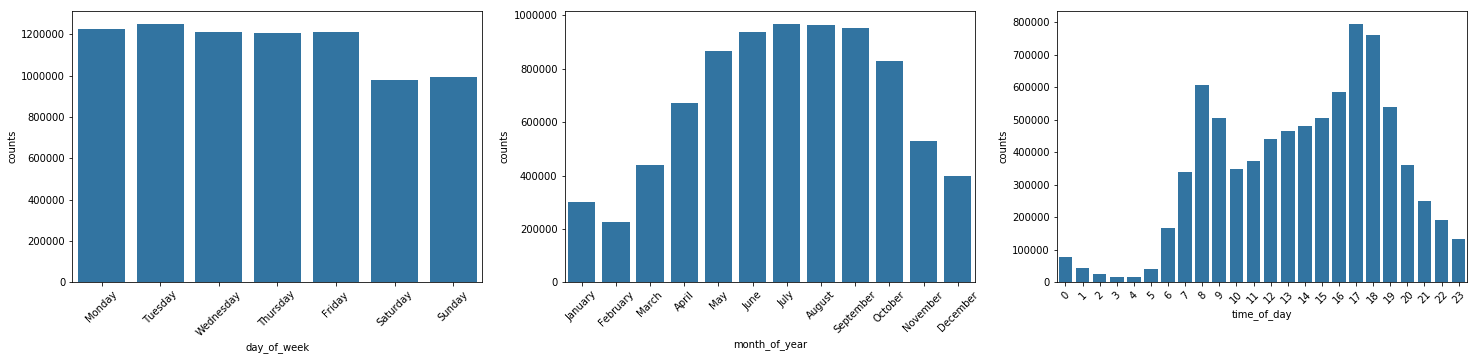

In [25]:


# for col in ['duration_sec', 'start_station_id'
#        ,'end_station_id', 'bike_id', 'user_type','member_birth_year', 'member_gender']:
#     plt.hist(data=trip, x=col)
#     plt.xlabel(col)
#     plt.ylabel('counts')
plt.figure(figsize=[25, 5])

plt.subplot(1,3,1)
col = 'day_of_week'
sb.countplot(data=trip, x=col, color=sb.color_palette()[0]);
plt.xlabel(col)
plt.ylabel('counts')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
col = 'month_of_year'
sb.countplot(data=trip, x=col, color=sb.color_palette()[0]);
plt.xlabel(col)
plt.ylabel('counts')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
col = 'time_of_day'
sb.countplot(data=trip, x=col, color=sb.color_palette()[0]);
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel(col)
plt.ylabel('counts')
plt.xticks(rotation=45)

In [19]:
# day_of_week - Unimodal. Most of te rides are taken on weekdays(Monday to Friday) and number of rides reduces to half on weekends.
# month_of_year - Unimodal, Most of the rides were taken for months Aug-December
# time_of_day - Bimodal , Most of the rides are taken between 8-10 hours and 17- 19 hours
# plt.xscale('log')
# trip['starttime'].dt.day_name().value_counts()

In [20]:
# trip['starttime'].dt.month_name().value_counts()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!